In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\Soumyajit\Downloads\titanic\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
n_col =  df.select_dtypes(include = ("int64", "float64")).keys()

In [5]:
n_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
df2 = df[n_col]

In [7]:
df2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [8]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [9]:
df3 = df2.fillna(df2.mean())

In [10]:
df3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [12]:
X = df3.drop("Survived", axis = 1)
y = df3["Survived"]
print("Shape of X = ", X.shape)
print("shape of y = ", y.shape)

Shape of X =  (891, 6)
shape of y =  (891,)


In [13]:
X_train,X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 51)

In [14]:
print("Shape of X_train = ",X_train.shape)
print("Shape of y_train = ",y_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of y_train = ",y_test.shape)

Shape of X_train =  (712, 6)
Shape of y_train =  (712,)
Shape of X_test =  (179, 6)
Shape of y_train =  (179,)


In [15]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [16]:
sc.mean_

array([4.44418539e+02, 2.30617978e+00, 2.95540912e+01, 5.47752809e-01,
       3.91853933e-01, 3.25793178e+01])

In [17]:
sc.scale_

array([261.47458702,   0.84405789,  12.99162985,   1.14065352,
         0.79647463,  51.32424676])

In [18]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,444.418539,2.306180,29.554091,0.547753,0.391854,32.579318
std,261.658400,0.844651,13.000763,1.141455,0.797035,51.360327
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,210.750000,1.750000,22.000000,0.000000,0.000000,7.917700
50%,448.500000,3.000000,29.699118,0.000000,0.000000,14.456250
75%,676.250000,3.000000,35.000000,1.000000,0.000000,31.068750
max,891.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [19]:
X_train_col =  X_train.keys()
X_train_col

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [20]:
X_test_col =  X_test.keys()
X_test_col

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
X_train_sc

array([[ 1.24899886,  0.8220055 , -0.42751304, -0.48020963, -0.49198545,
        -0.4496767 ],
       [-1.11451955,  0.8220055 ,  1.997125  , -0.48020963, -0.49198545,
        -0.47792845],
       [ 1.09984478,  0.8220055 , -1.42815732, -0.48020963, -0.49198545,
        -0.26871934],
       ...,
       [ 1.1189671 ,  0.8220055 ,  1.41983023,  0.39648077,  3.27461284,
         0.03498701],
       [ 0.15902678,  0.8220055 ,  0.01116307,  2.14986159,  0.76354731,
        -0.13858202],
       [-1.47784358,  0.8220055 , -0.08113618, -0.48020963, -0.49198545,
        -0.49392089]])

In [23]:
X_test_sc

array([[-1.58110409, -1.54750023,  0.80404914, -0.48020963, -0.49198545,
        -0.09466321],
       [-0.05514318,  0.8220055 ,  0.18826805, -0.48020963, -0.49198545,
        -0.47792845],
       [ 0.34642549,  0.8220055 ,  0.03432278, -0.48020963, -0.49198545,
        -0.46599452],
       ...,
       [-0.48730755, -0.36274737, -0.42751304,  0.39648077, -0.49198545,
        -0.12819122],
       [ 0.94304178, -1.54750023,  0.11129541,  0.39648077, -0.49198545,
         0.4758118 ],
       [-1.1718865 , -1.54750023,  0.57313123,  0.39648077, -0.49198545,
         0.39982432]])

In [24]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_col)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_col)


In [25]:
X_train_sc

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.248999,0.822005,-0.427513,-0.480210,-0.491985,-0.449677
1,-1.114520,0.822005,1.997125,-0.480210,-0.491985,-0.477928
2,1.099845,0.822005,-1.428157,-0.480210,-0.491985,-0.268719
3,1.268121,0.822005,-0.889349,-0.480210,-0.491985,-0.483774
4,-0.456712,0.822005,0.011163,6.533314,2.019080,0.720336
...,...,...,...,...,...,...
707,0.323479,0.822005,0.727077,-0.480210,-0.491985,-0.480364
708,1.015707,0.822005,0.011163,0.396481,0.763547,-0.337726
709,1.118967,0.822005,1.419830,0.396481,3.274613,0.034987
710,0.159027,0.822005,0.011163,2.149862,0.763547,-0.138582


In [26]:
X_test_sc

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.581104,-1.547500,0.804049,-0.480210,-0.491985,-0.094663
1,-0.055143,0.822005,0.188268,-0.480210,-0.491985,-0.477928
2,0.346425,0.822005,0.034323,-0.480210,-0.491985,-0.465995
3,0.725047,-1.547500,0.011163,-0.480210,-0.491985,-0.634774
4,-0.104861,-0.362747,0.342213,0.396481,0.763547,-0.001545
...,...,...,...,...,...,...
174,1.604674,0.822005,0.011163,6.533314,2.019080,0.720336
175,0.705925,0.822005,-0.273568,-0.480210,-0.491985,-0.480933
176,-0.487308,-0.362747,-0.427513,0.396481,-0.491985,-0.128191
177,0.943042,-1.547500,0.111295,0.396481,-0.491985,0.475812


In [27]:
X_train_sc.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.248999,0.822005,-0.427513,-0.480210,-0.491985,-0.449677
1,-1.114520,0.822005,1.997125,-0.480210,-0.491985,-0.477928
2,1.099845,0.822005,-1.428157,-0.480210,-0.491985,-0.268719
3,1.268121,0.822005,-0.889349,-0.480210,-0.491985,-0.483774
4,-0.456712,0.822005,0.011163,6.533314,2.019080,0.720336


In [28]:
X_test_sc.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.581104,-1.547500,0.804049,-0.480210,-0.491985,-0.094663
1,-0.055143,0.822005,0.188268,-0.480210,-0.491985,-0.477928
2,0.346425,0.822005,0.034323,-0.480210,-0.491985,-0.465995
3,0.725047,-1.547500,0.011163,-0.480210,-0.491985,-0.634774
4,-0.104861,-0.362747,0.342213,0.396481,0.763547,-0.001545


In [29]:
X_train_sc.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.00,712.00,712.00,712.00,712.00,712.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.70,-1.55,-2.24,-0.48,-0.49,-0.63
25%,-0.89,-0.66,-0.58,-0.48,-0.49,-0.48
50%,0.02,0.82,0.01,-0.48,-0.49,-0.35
75%,0.89,0.82,0.42,0.40,-0.49,-0.03
max,1.71,0.82,3.19,6.53,5.79,9.35


In [30]:
X_test_sc.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,179.00,179.00,179.00,179.00,179.00,179.00
mean,0.03,0.01,0.06,-0.11,-0.06,-0.04
std,0.92,0.95,1.00,0.81,1.06,0.83
min,-1.68,-1.55,-2.21,-0.48,-0.49,-0.63
25%,-0.73,-0.36,-0.47,-0.48,-0.49,-0.48
50%,-0.02,0.82,0.01,-0.48,-0.49,-0.35
75%,0.77,0.82,0.42,0.40,-0.49,-0.04
max,1.70,0.82,3.88,6.53,7.04,4.49


In [31]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [32]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [33]:
X_train_mmc

array([[0.86516854, 1.        , 0.33408898, 0.        , 0.        ,
        0.01854277],
       [0.17078652, 1.        , 0.78039105, 0.        , 0.        ,
        0.01571255],
       [0.82134831, 1.        , 0.14990082, 0.        , 0.        ,
        0.03667076],
       ...,
       [0.82696629, 1.        , 0.67412865, 0.125     , 0.6       ,
        0.06709553],
       [0.54494382, 1.        , 0.4148359 , 0.375     , 0.2       ,
        0.04970769],
       [0.06404494, 1.        , 0.39784642, 0.        , 0.        ,
        0.01411046]])

In [34]:
X_test_mmc

array([[0.03370787, 0.        , 0.56078209, 0.        , 0.        ,
        0.0541074 ],
       [0.48202247, 1.        , 0.44743553, 0.        , 0.        ,
        0.01571255],
       [0.6       , 1.        , 0.41909889, 0.        , 0.        ,
        0.01690807],
       ...,
       [0.35505618, 0.5       , 0.33408898, 0.125     , 0.        ,
        0.05074862],
       [0.7752809 , 0.        , 0.43326721, 0.125     , 0.        ,
        0.11125659],
       [0.15393258, 0.        , 0.51827713, 0.125     , 0.        ,
        0.1036443 ]])

In [35]:
X_train_mmc = pd.DataFrame(X_train_mmc, columns=X_train_col)
X_test_mmc = pd.DataFrame(X_test_mmc, columns=X_test_col)

In [36]:
X_train_mmc

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.865169,1.0,0.334089,0.000,0.0,0.018543
1,0.170787,1.0,0.780391,0.000,0.0,0.015713
2,0.821348,1.0,0.149901,0.000,0.0,0.036671
3,0.870787,1.0,0.249079,0.000,0.0,0.015127
4,0.364045,1.0,0.414836,1.000,0.4,0.135753
...,...,...,...,...,...,...
707,0.593258,1.0,0.546614,0.000,0.0,0.015469
708,0.796629,1.0,0.414836,0.125,0.2,0.029758
709,0.826966,1.0,0.674129,0.125,0.6,0.067096
710,0.544944,1.0,0.414836,0.375,0.2,0.049708


In [37]:
X_test_mmc

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.033708,0.0,0.560782,0.000,0.0,0.054107
1,0.482022,1.0,0.447436,0.000,0.0,0.015713
2,0.600000,1.0,0.419099,0.000,0.0,0.016908
3,0.711236,0.0,0.414836,0.000,0.0,0.000000
4,0.467416,0.5,0.475772,0.125,0.2,0.063436
...,...,...,...,...,...,...
174,0.969663,1.0,0.414836,1.000,0.4,0.135753
175,0.705618,1.0,0.362426,0.000,0.0,0.015412
176,0.355056,0.5,0.334089,0.125,0.0,0.050749
177,0.775281,0.0,0.433267,0.125,0.0,0.111257


In [38]:
X_train_mmc.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.865169,1.0,0.334089,0.0,0.0,0.018543
1,0.170787,1.0,0.780391,0.0,0.0,0.015713
2,0.821348,1.0,0.149901,0.0,0.0,0.036671
3,0.870787,1.0,0.249079,0.0,0.0,0.015127
4,0.364045,1.0,0.414836,1.0,0.4,0.135753


In [39]:
X_test_mmc.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.033708,0.0,0.560782,0.000,0.0,0.054107
1,0.482022,1.0,0.447436,0.000,0.0,0.015713
2,0.600000,1.0,0.419099,0.000,0.0,0.016908
3,0.711236,0.0,0.414836,0.000,0.0,0.000000
4,0.467416,0.5,0.475772,0.125,0.2,0.063436


In [40]:
X_train_mmc.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.00,712.00,712.00,712.00,712.00,712.00
mean,0.50,0.65,0.41,0.07,0.08,0.06
std,0.29,0.42,0.18,0.14,0.16,0.10
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.24,0.38,0.31,0.00,0.00,0.02
50%,0.50,1.00,0.41,0.00,0.00,0.03
75%,0.76,1.00,0.49,0.12,0.00,0.06
max,1.00,1.00,1.00,1.00,1.00,1.00


In [41]:
X_test_mmc.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,179.00,179.00,179.00,179.00,179.00,179.00
mean,0.51,0.66,0.42,0.05,0.07,0.06
std,0.27,0.40,0.18,0.12,0.17,0.08
min,0.01,0.00,0.01,0.00,0.00,0.00
25%,0.28,0.50,0.33,0.00,0.00,0.02
50%,0.49,1.00,0.41,0.00,0.00,0.03
75%,0.72,1.00,0.49,0.12,0.00,0.06
max,1.00,1.00,1.13,1.00,1.20,0.51


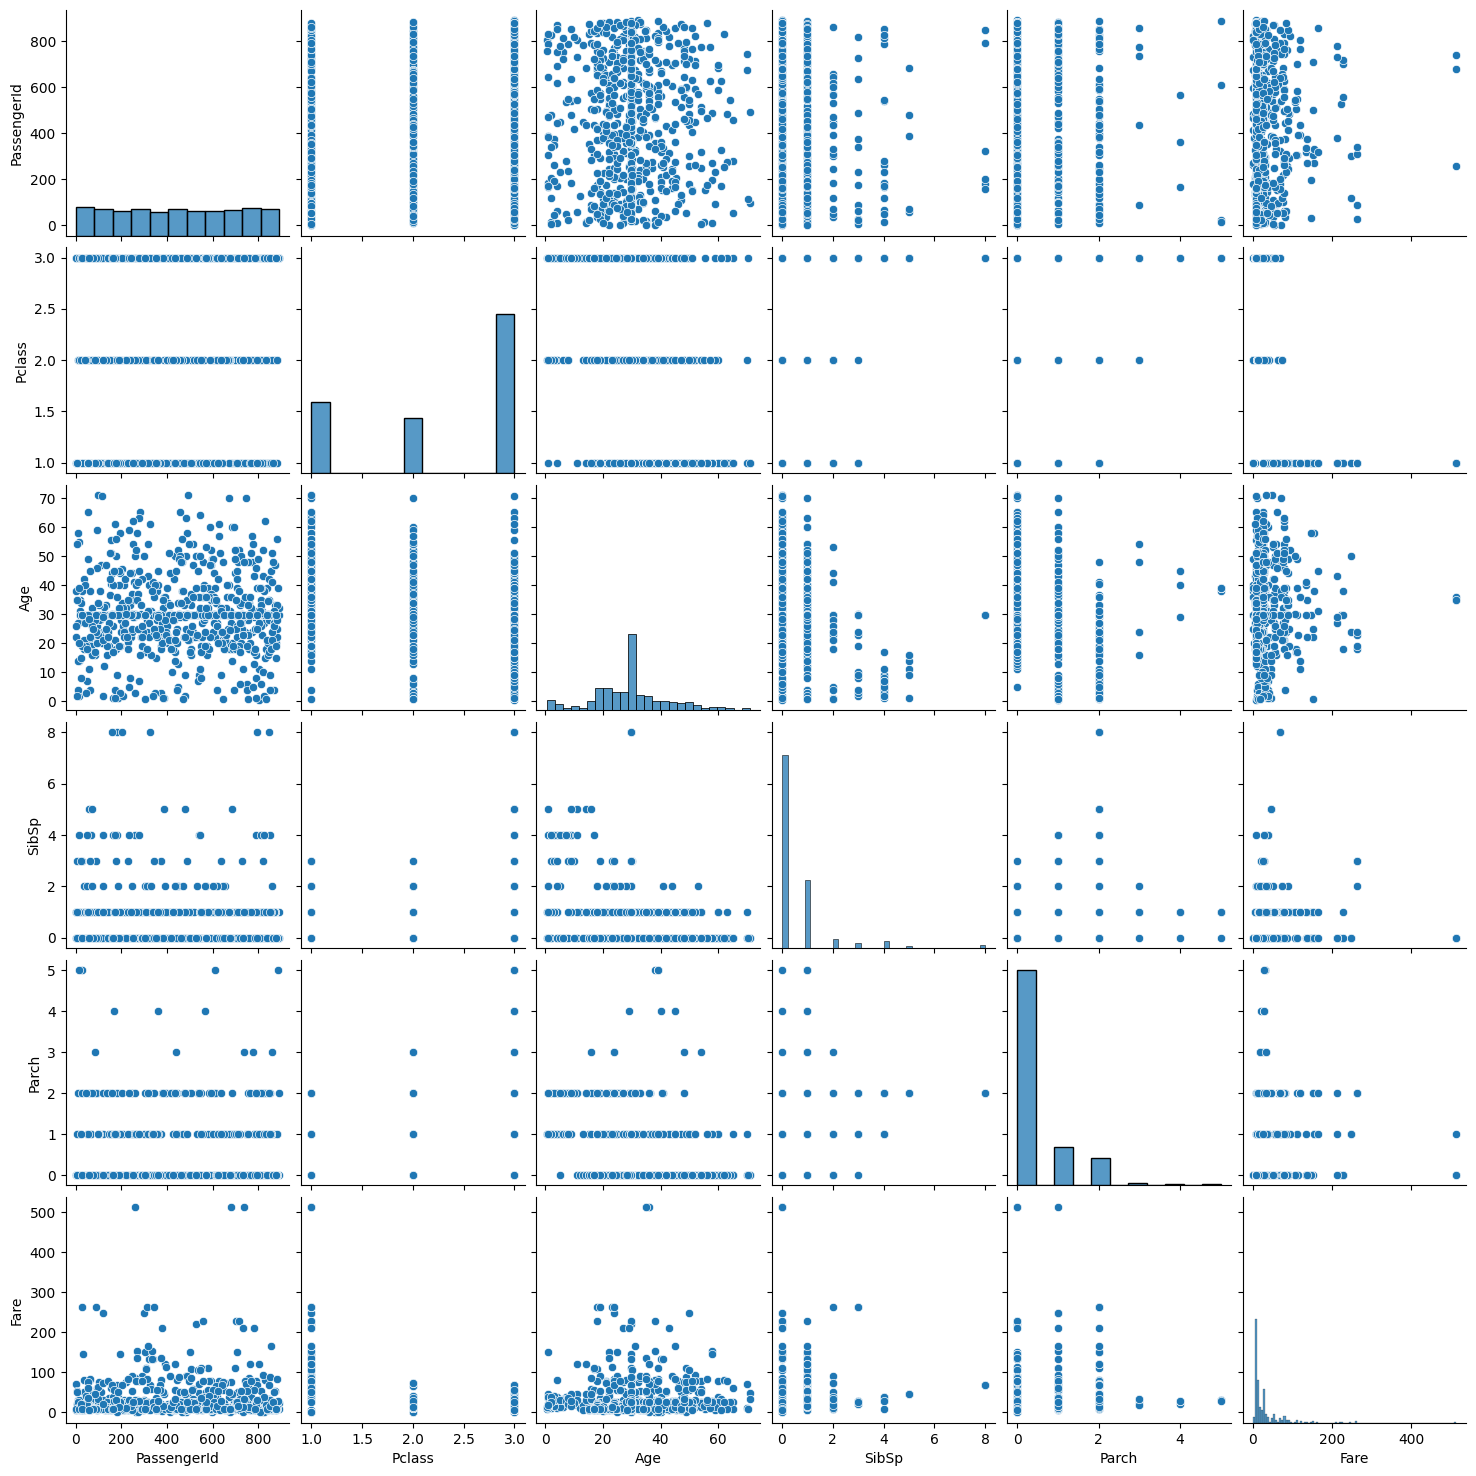

In [42]:
sns.pairplot(X_train)

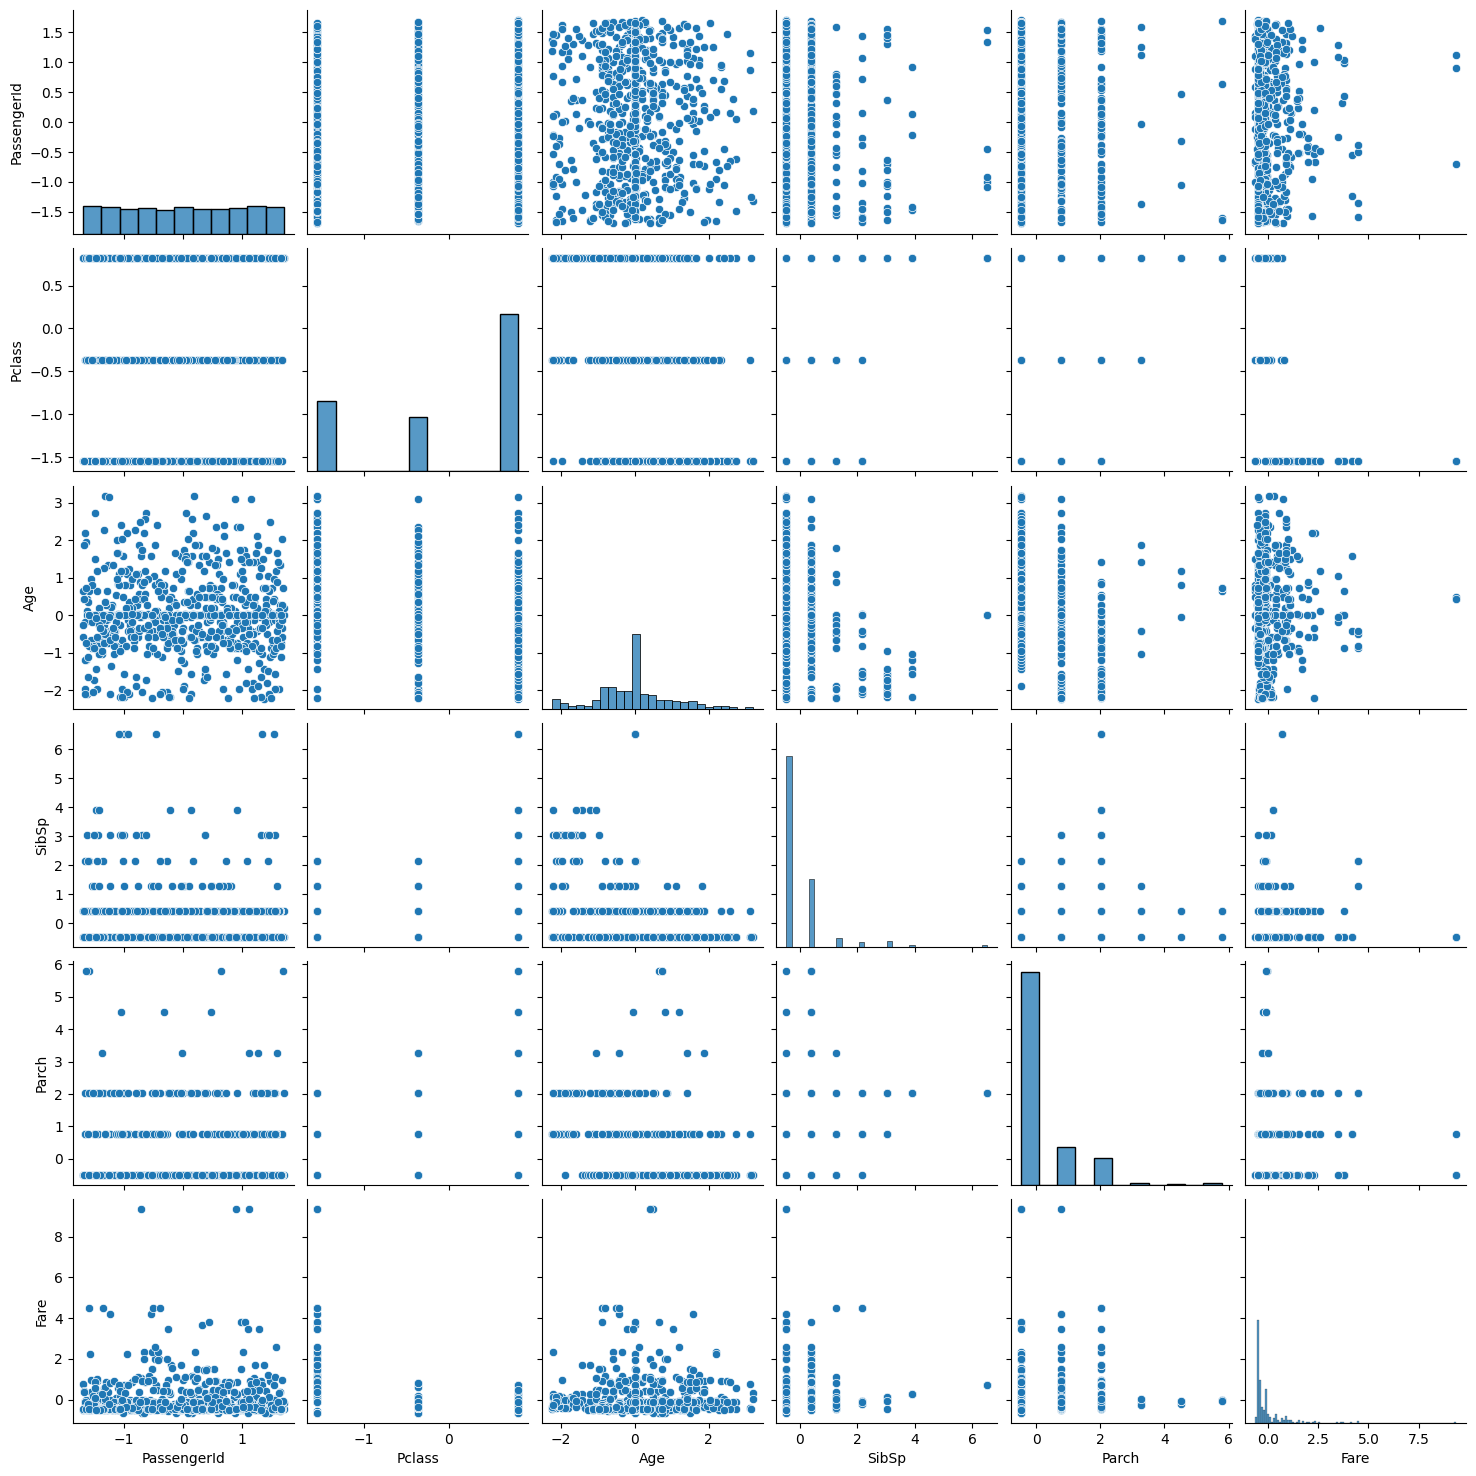

In [43]:
sns.pairplot(X_train_sc)

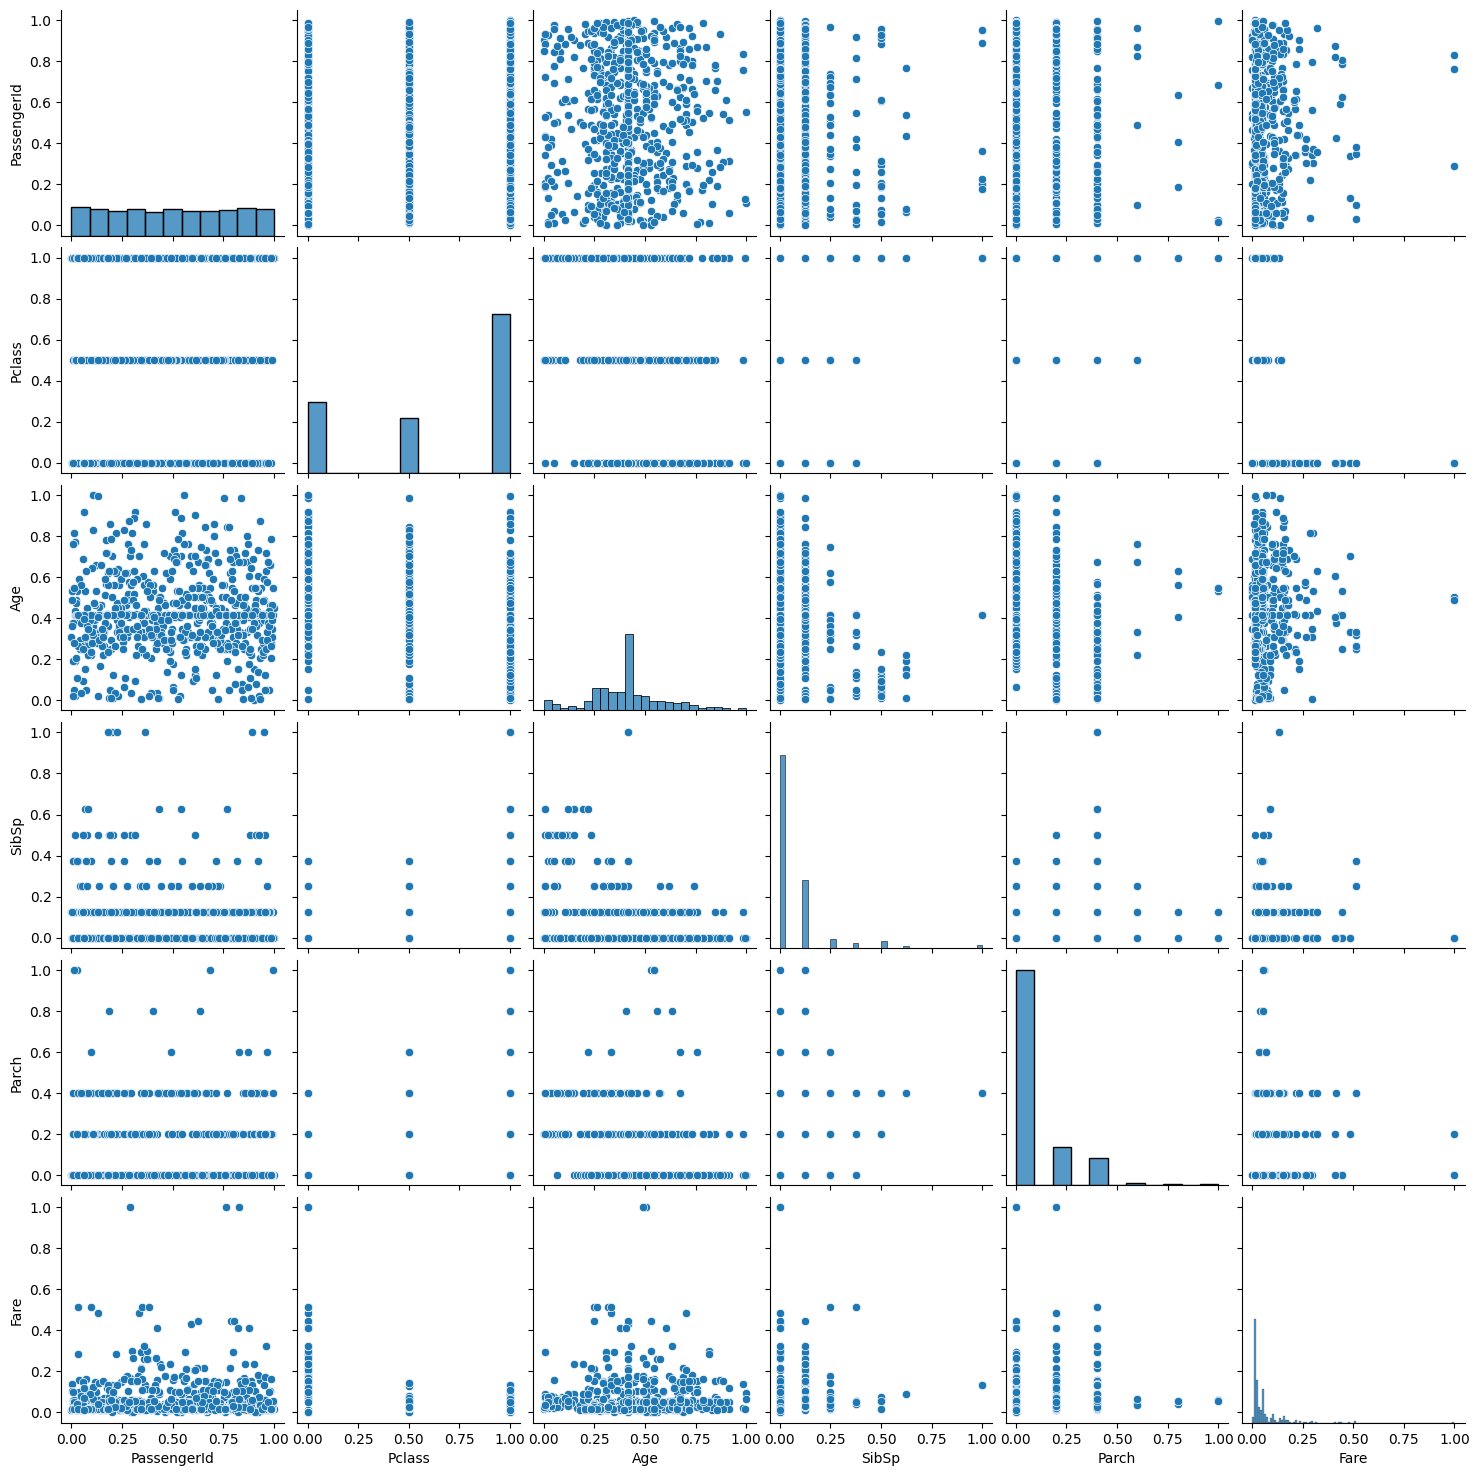

In [44]:
sns.pairplot(X_train_mmc)